In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df1 = pd.read_csv('clicksdata.kw8322228.csv')
df2 = pd.read_csv('clicksdata.kw8322392.csv')
df3 = pd.read_csv('clicksdata.kw8322393.csv')
df4 = pd.read_csv('clicksdata.kw8322445.csv')

In [6]:
df2

,Unnamed: 0,bid.value,n.clicks
0,1,1.44,30
1,2,2.07,45
2,3,2.78,60
3,4,3.57,75
4,5,4.47,66
5,6,5.52,83
6,7,6.77,98
7,8,8.33,106
8,9,10.38,131


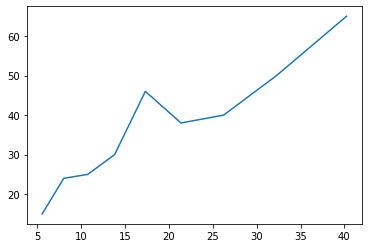

In [22]:
plt.plot(df1['bid.value'],df1['n.clicks'])

In [191]:
from scipy.optimize import curve_fit
def func(b,alpha,beta):
    return alpha*(1-np.exp(-beta*b))

popt = []
cov = []
for i in [df1,df2,df3,df4]:
    g1 = i.sort_values(by = 'n.clicks',ascending= False)['bid.value'].reset_index(drop = True)[0]
    popt.append(curve_fit(func, i['bid.value'],i['n.clicks'],[g1,(1/(i['bid.value'].mean()))])[0])
    #cov.append(curve_fit(func, SF, response.iloc[:,i], p0[i])[1])

In [92]:
df1.sort_values(by = 'n.clicks',ascending= False)['bid.value'].reset_index(drop = True)[0]

40.24

In [93]:
popt

[array([7.40913934e+01, 3.94485325e-02]),
 array([1.56440253e+02, 1.50082088e-01]),
 array([1.04799351e+02, 7.97165095e-02]),
 array([188.11203013,   0.43228883])]

In [94]:
results = pd.DataFrame(popt,columns = ['alpha','beta'])
results

,alpha,beta
0,74.091393,0.039449
1,156.440253,0.150082
2,104.799351,0.079717
3,188.112030,0.432289


___

In [55]:
ltv_conv = pd.read_excel('hw-kw-ltv-conv.rate-data.xlsx')

In [193]:
from scipy.optimize import curve_fit
import scipy.optimize as optimize
def func(b):
    return -results.iloc[i,0]*(1-np.exp(-results.iloc[i,1]*b))*(ltv_conv['ltv'][i]*ltv_conv['conv.rate'][i] - b)
opt_bid = []
popt = []
cov = []
dfs = [df1,df2,df3,df4]

for i in range(4):
    optimizer_output = optimize.minimize(func, dfs[i]['bid.value'][0])
    opt_bid.append(float(optimizer_output.x))
opt_bid


[34.12777742653684, 13.563482133501077, 22.43387945209648, 5.816980876821396]

In [133]:
def expenditure(b):
    return b*results.iloc[i,0]*(1-np.exp(-results.iloc[i,1]*b))

In [134]:
### Calculating profits for each keyword
profit = []
exp = []
for i in range(4):
    profit.append(float(-func(opt_bid[i])))
    exp.append(expenditure(opt_bid[i]))

In [151]:
keywords = ['kw8322228','kw8322392','kw8322393','kw8322445']

In [152]:
results2 = np.array([keywords,opt_bid,profit,exp])
results2 = results2.transpose().reshape((4,4))


In [154]:
results2 = pd.DataFrame(results2, columns =['Keywords','Optimal Bid','Profit','Expenditure'])

In [155]:
results2

,Keywords,Optimal Bid,Profit,Expenditure
0,kw8322228,34.12777742653684,3950.4618282517545,1870.6302815787767
1,kw8322392,13.563482133501077,6032.910380791332,1844.7632072732642
2,kw8322393,22.43387945209648,5451.615042487786,1957.8753027990222
3,kw8322445,5.816980876821396,4544.199940422778,1005.7263220031255


_____

In [220]:
results

,alpha,beta
0,74.091393,0.039449
1,156.440253,0.150082
2,104.799351,0.079717
3,188.112030,0.432289


In [226]:
def func2(b):
    total_profit= 0 
    for i in range(4):
        profit = results.iloc[i,0]*(1-np.exp(-results.iloc[i,1]*b[i]))*(ltv_conv['ltv'][i]*ltv_conv['conv.rate'][i] - b[i])
        total_profit += profit 
    return -total_profit
    

In [232]:
def total_expenditure(b):
    total_expenditure = 0
    for i in range(4):
        expenditure =b[i]*results.iloc[i,0]*(1-np.exp(-results.iloc[i,1]*b[i]))
        total_expenditure += expenditure
    return total_expenditure

budget = 3000
b1 = [20,20,20,20]
budget_constraint_object = optimize.NonlinearConstraint(total_expenditure, 0, budget)
bounds_object = optimize.Bounds(0, np.inf)

optimizer_output = optimize.minimize(func2,b1, method='trust-constr',  bounds= bounds_object,constraints=budget_constraint_object)
optimal_bids = optimizer_output.x

In [233]:
total_expenditure(optimal_bids)

2999.9999987783253

In [241]:
profit2 = []
expenditure2 = []
for i in range(4):
    profit2.append(-func(optimal_bids[i]))
    expenditure2.append(optimal_bids[i]*results.iloc[i,0]*(1-np.exp(-results.iloc[i,1]*optimal_bids[i])))

In [242]:
optimal_bids

array([17.92426926,  8.11845182, 12.82826992,  3.77570616])

In [244]:
results3 = np.array([keywords,optimal_bids,profit2,expenditure2])
results3 = results3.transpose().reshape((4,4))

results3 = pd.DataFrame(results3, columns =['Keywords','Optimal Bid','Profit','Expenditure'])
results3

,Keywords,Optimal Bid,Profit,Expenditure
0,kw8322228,17.924269263309792,3315.5033401327514,673.2085264658396
1,kw8322392,8.11845182195302,5487.234018026895,894.5072320215571
2,kw8322393,12.828269922957402,4836.6113164008675,860.8833923217323
3,kw8322445,3.775706156318174,4286.48969235217,571.4008479691962


In [245]:
ltv_conv

,keyword,ltv,conv.rate
0,kw8322228,354,0.30
1,kw8322392,181,0.32
2,kw8322393,283,0.30
3,kw8322445,107,0.30


In [246]:
results

,alpha,beta
0,74.091393,0.039449
1,156.440253,0.150082
2,104.799351,0.079717
3,188.112030,0.432289


Relation between LTV & alpha: As ltv increases, alpha decreases. 
Relation between LTV & beta: As ltv increases, beta decreases. 
Relation between LTV & Optimal Bid: As ltv increases, optimal bid increases. 

Possible explanation: As the LTV of a customer increases, it would make sense that the alpha and beta variables decrease. Alpha = search volume * CTR at position 1. CTR is almost constant. The expression shows that as alpha decreases, search volume decreases. This is coupled with an increase in LTV which does make sense because if the LTV is high, then customers are going to be "loyal" to the advertiser and will not search any of the generic keywords again because they have found their platform of choice. 

In [266]:
list(results2['Expenditure'].values)

['1870.6302815787767',
 '1844.7632072732642',
 '1957.8753027990222',
 '1005.7263220031255']

In [287]:
results2

,Keywords,Optimal Bid,Profit,Expenditure
0,kw8322228,34.12777742653684,3950.4618282517545,1870.6302815787767
1,kw8322392,13.563482133501077,6032.910380791332,1844.7632072732642
2,kw8322393,22.43387945209648,5451.615042487786,1957.8753027990222
3,kw8322445,5.816980876821396,4544.199940422778,1005.7263220031255


In [288]:
results3

,Keywords,Optimal Bid,Profit,Expenditure
0,kw8322228,17.924269263309792,3315.5033401327514,673.2085264658396
1,kw8322392,8.11845182195302,5487.234018026895,894.5072320215571
2,kw8322393,12.828269922957402,4836.6113164008675,860.8833923217323
3,kw8322445,3.775706156318174,4286.48969235217,571.4008479691962


In [ ]:
[0.64,0.52,0.56,0.56]

Keyword 2 has the least reduction in expenditure (~52%) 